In [1]:
import time
import warnings
warnings.filterwarnings("ignore")

# An advanced Twitter scraping & OSINT tool written in Python that doesn't use Twitter's API.
import twint

# Solve compatibility issues with notebooks and RunTime errors.
import warnings
import nest_asyncio
import os
import sys
sys.path.append("twint/")
nest_asyncio.apply()
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

# Python preprocessing library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# Variable             Type       Description
# Username             (string) - Twitter user's username
# User_id              (string) - Twitter user's user_id
# Search               (string) - Search terms
# Geo                  (string) - Geo coordinates (lat,lon,km/mi.)
# Location             (bool)   - Set to True to attempt to grab a Twitter user's location (slow).
# Near                 (string) - Near a certain City (Example: london)
# Lang                 (string) - Compatible language codes: https://github.com/twintproject/twint/wiki/Langauge-codes
# Output               (string) - Name of the output file.
# Elasticsearch        (string) - Elasticsearch instance
# Timedelta            (int)    - Time interval for every request (days)
# Year                 (string) - Filter Tweets before the specified year.
# Since                (string) - Filter Tweets sent since date (Example: 2017-12-27).
# Until                (string) - Filter Tweets sent until date (Example: 2017-12-27).
# Email                (bool)   - Set to True to show Tweets that _might_ contain emails.
# Phone                (bool)   - Set to True to show Tweets that _might_ contain phone numbers.
# Verified             (bool)   - Set to True to only show Tweets by _verified_ users
# Store_csv            (bool)   - Set to True to write as a csv file.
# Store_json           (bool)   - Set to True to write as a json file.
# Custom               (dict)   - Custom csv/json formatting (see below).
# Show_hashtags        (bool)   - Set to True to show hashtags in the terminal output.
# Limit                (int)    - Number of Tweets to pull (Increments of 20).
# Count                (bool)   - Count the total number of Tweets fetched.
# Stats                (bool)   - Set to True to show Tweet stats in the terminal output.
# Database             (string) - Store Tweets in a sqlite3 database. Set this to the DB. (Example: twitter.db)
# To                   (string) - Display Tweets tweeted _to_ the specified user.
# All                  (string) - Display all Tweets associated with the mentioned user.
# Debug                (bool)   - Store information in debug logs.
# Format               (string) - Custom terminal output formatting.
# Essid                (string) - Elasticsearch session ID.
# User_full            (bool)   - Set to True to display full user information. By default, only usernames are shown.
# Profile_full         (bool)   - Set to True to use a slow, but effective method to enumerate a user's Timeline.
# Store_object         (bool)   - Store tweets/user infos/usernames in JSON objects.
# Store_pandas         (bool)   - Save Tweets in a DataFrame (Pandas) file.
# Pandas_type          (string) - Specify HDF5 or Pickle (HDF5 as default).
# Pandas               (bool)   - Enable Pandas integration.
# Index_tweets         (string) - Custom Elasticsearch Index name for Tweets (default: twinttweets).
# Index_follow         (string) - Custom Elasticsearch Index name for Follows (default: twintgraph).
# Index_users          (string) - Custom Elasticsearch Index name for Users (default: twintuser).
# Index_type           (string) - Custom Elasticsearch Document type (default: items).
# Retries_count        (int)    - Number of retries of requests (default: 10).
# Resume               (int)    - Resume from a specific tweet id (**currently broken, January 11, 2019**).
# Images               (bool)   - Display only Tweets with images.
# Videos               (bool)   - Display only Tweets with videos.
# Media                (bool)   - Display Tweets with only images or videos.
# Replies              (bool)   - Display replies to a subject.
# Pandas_clean         (bool)   - Automatically clean Pandas dataframe at every scrape.
# Lowercase            (bool)   - Automatically convert uppercases in lowercases.
# Pandas_au            (bool)   - Automatically update the Pandas dataframe at every scrape.
# Proxy_host           (string) - Proxy hostname or IP.
# Proxy_port           (int)    - Proxy port.
# Proxy_type           (string) - Proxy type.
# Tor_control_port     (int) - Tor control port.
# Tor_control_password (string) - Tor control password (not hashed).
# Retweets             (bool)   - Display replies to a subject.
# Hide_output          (bool)   - Hide output.
# Get_replies          (bool)   - All replies to the tweet.

In [3]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# 63 Top Forex Twitter Accounts: 
# https://www.forexcrunch.com/60-top-forex-twitter-accounts/
# https://towardsdatascience.com/analyzing-tweets-with-nlp-in-minutes-with-spark-optimus-and-twint-a0c96084995f
def tweets_to_dateframe_by_year(search, output_file, year="2020"):
    # Configure
    c = twint.Config()
    c.Search = search
    c.Year = year
    c.Lang = "en"
    c.Pandas = True
    c.Store_csv = True
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Output = output_file
    c.Hide_output = True

    # Run
    with HiddenPrints():
        print(twint.run.Search(c))
    
    return "Done scraping tweets!"

def tweets_to_dateframe_by_interval(search, output_file, since, until):
    # Configure
    c = twint.Config()
    c.Search = search
    c.Since = since
    c.Until = until
    c.Lang = "en"
    c.Pandas = True
    c.Store_csv = True
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Output = output_file
    c.Hide_output = True

    # Run
    with HiddenPrints():
        print(twint.run.Search(c))
    
    return "Done scraping tweets!"

In [4]:
import requests
from bs4 import BeautifulSoup

headers = {'user-agent': 
           'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
url = "https://www.forexcrunch.com/60-top-forex-twitter-accounts/"
res = requests.get(url, headers=headers).text
soup = BeautifulSoup(res, "html.parser")
trader_account = []
table = soup.find(name="ol")
for account in table.find_all(name="li"):
    name = account.find(name="a").text
    name = name.replace("@", "")
    trader_account.append(name)

## Twint Proxies Issues (Not Solved)
Twitter is blocking your IP for a fixed period of time (about 7 mins) after scraping a large batch of tweets. This progressive backoff is the best work around we've found so far. You'll just have to suck it up unless you can rotate your IP each time you get blocked.

Reference from [here](https://github.com/twintproject/twint/issues/604)

In [ ]:
%%time
for account in tqdm(trader_account):
    tweets_to_dateframe_by_interval(
        search=account, 
        output_file="../data/forex.csv", 
        since="2015-09-01", 
        until="2015-10-31")

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecti

In [5]:
# for year in tqdm(["2017", "2018", "2019", "2020"]):
#     for account in trader_account:
#         tweets_to_dateframe_by_year(
#            search=account, 
#            output_file="../data/forex.csv", 
#            year=year)

In [9]:
df = pd.read_csv("../data/forex.csv", 
                 usecols=["date", "time", "username", "tweet", "hashtags", "likes_count", "replies_count", "retweets_count"])
print("# of tweets: {}".format(df.shape[0]))
df.sort_values(by="date", ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

# of tweets: 459793


,date,time,username,tweet,replies_count,retweets_count,likes_count,hashtags
0,2015-01-02,22:37:53,seekinwealth,"ForexLive: Cable continues lower, nears 1.5400...",0,0,0,['#forex']
1,2015-01-02,23:58:43,forexcommentary,Technical analysis: GBP/USD taking it on the c...,0,1,1,['#forex']
2,2015-01-02,23:57:17,cdethleffsen,Trends in US Manufacturing\n http://bit.ly/1Ai...,0,0,1,[]
3,2015-01-02,23:55:36,forexnow,Technical analysis: GBP/USD taking it on the c...,0,0,1,[]
4,2015-01-02,23:51:07,forexlive,"USD/JPY quickly gives up gains, slides back to...",0,0,1,[]


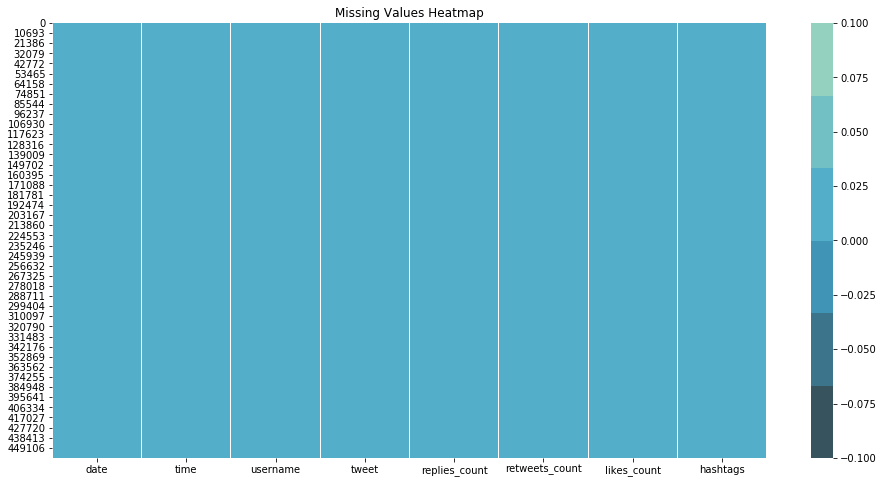

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=True, cmap=sns.color_palette("GnBu_d"))
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
before = df.shape[0]
print("# of tweets before dropping duplicates: {}".format(before))
df.drop_duplicates(inplace=True)
after = df.shape[0]
print("# of tweets after dropping duplicates: {}".format(after))
print("# of tweets being dropped: {}".format(before-after))

# 1993 days
print(df["date"].unique().shape)
print(df["date"].min())
print(df["date"].max())

# of tweets before dropping duplicates: 459793
# of tweets after dropping duplicates: 449783
# of tweets being dropped: 10010


## Matplotlib & Seaborn Helper Function

In [12]:
def add_frequency(ax, df):
    ncount = len(df)
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    ax2.set_ylim(0, 100)
    ax2.grid(None)
    
def upper_rugplot(data, height=.05, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    ax = ax or plt.gca()
    kwargs.setdefault("linewidth", 1)
    segs = np.stack((np.c_[data, data],
                     np.c_[np.ones_like(data), np.ones_like(data)-height]),
                    axis=-1)
    lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
    ax.add_collection(lc)

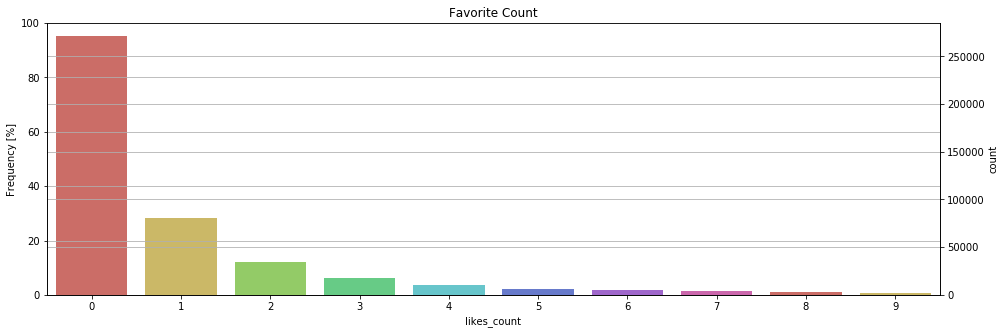

In [13]:
plt.figure(figsize=(16, 5))
ax = sns.countplot("likes_count", data=df, palette=sns.color_palette("hls", 8))
plt.title("Favorite Count")
plt.xlim((-0.5, 9.5))
plt.grid(axis="y")
add_frequency(ax, df)
plt.show()

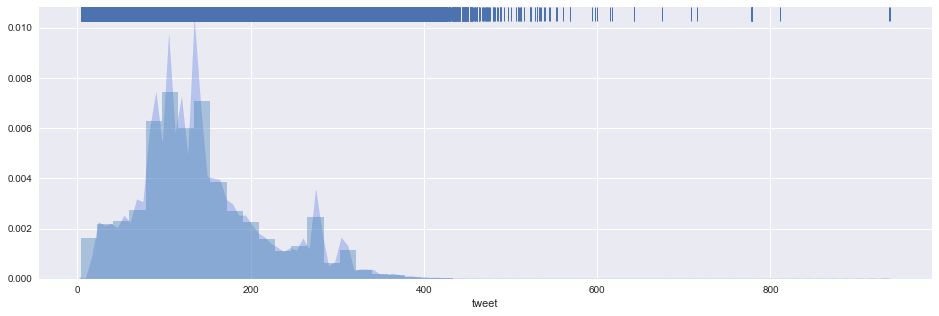

In [14]:
plt.style.use("seaborn")
plt.figure(figsize=(16, 5))
ax = sns.distplot(
    df["tweet"].map(len), color="steelblue", kde=True, 
    kde_kws={"color": "royalblue", "alpha": 0.3, "linewidth": .2, "shade": True, 'bw': 0.5})
upper_rugplot(df["tweet"].map(len), height=.05, ax=ax)
plt.show()

In [15]:
# Spacy entity description: https://spacy.io/api/annotation
# conda install -c conda-forge spacy -y
import spacy
from spacy import displacy

def show_entities(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
    options = {"ents": ["ORG"], "colors": colors}
    displacy.render(doc, style="ent", jupyter=True)
    
show_entities(df.iloc[100]["tweet"])